<h1><center></center></h1>
<h1><center>Elevvo Internship</center></h1>
<h1><center>Task 2</center></h1>
<h2><center>News Category Classification</center></h2>

# **Hands on Task 2**

- We build a text classification pipeline using the AG News Dataset.
- We clean and preprocess the text (lowercasing, punctuation removal, stopwords, lemmatization).
- We apply `TF-IDF` to vectorize the news articles.
- We train a multiclass classifier: Logistic Regression.
- Finally, we evaluate the model and visualize word clouds for each category.

# **1- Data Collection**

**Setup**

In [1]:
!pip install datasets --quiet
!pip install nltk wordcloud --quiet

**Import required libraries**

In [2]:
from datasets import load_dataset
import pandas as pd

**Load AG News dataset directly from Hugging Face**

In [3]:
dataset = load_dataset("ag_news")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**Convert to DataFrames**

In [4]:
df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])

**Preview data**

In [5]:
df_train.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


**Check classes balance**

In [6]:
df_train['label'].value_counts()

,count
label,
2,30000
3,30000
1,30000
0,30000


**Label mapping**

In [7]:
label_names = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
df_train["category"] = df_train["label"].map(label_names)
df_test["category"] = df_test["label"].map(label_names)

**Preview data after mapping**

In [8]:
df_train.head()

,text,label,category
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


**Save CSV's**

In [9]:
df_train.to_csv("ag_news_train.csv", index=False)
df_test.to_csv("ag_news_test.csv", index=False)

# **2. Preprocessing**

**Import NLP preprocessing libraries (NLTK, regex)**

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**Download NLTK resources (stopwords, tokenizer, lemmatizer)**

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Initialize stopword list and lemmatizer**

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

**Define text preprocessing function**

In [13]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(processed_tokens)

**Apply preprocessing to all reviews in train/test sets**

In [14]:
df_train['processed_text'] = df_train['text'].apply(preprocess_text)
df_test['processed_text'] = df_test['text'].apply(preprocess_text)

df_train[['text', 'processed_text']].head()

,text,processed_text
0,Wall St. Bears Claw Back Into the Black (Reute...,wall st bear claw back black reuters reuters s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look toward commercial aerospace reute...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stock outlook reuters reuter...
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halt oil export main southern pipeline re...
4,"Oil prices soar to all-time record, posing new...",oil price soar alltime record posing new menac...


# **3. Vectorization**

**Import TF-IDF vectorizer**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Initialize TF-IDF vectorizer**

In [16]:
tfidf = TfidfVectorizer(max_features=5000)

**Fit and transform training data**

In [17]:
X_train_vec = tfidf.fit_transform(df_train['processed_text'])

**Transform test data using the same vectorizer**

In [18]:
X_test_vec = tfidf.transform(df_test['processed_text'])

**Check shape**

In [19]:
print("TF-IDF Matrix (Train):", X_train_vec.shape)
print("TF-IDF Matrix (Test):", X_test_vec.shape)

TF-IDF Matrix (Train): (120000, 5000)
TF-IDF Matrix (Test): (7600, 5000)


# **4. Model Training & Evaluation**

**Import classification model and evaluation tools**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

**Train Logistic Regression model**

In [21]:
clf = LogisticRegression()
clf.fit(X_train_vec, df_train['label'])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Make predictions on the test set**

In [22]:
y_pred = clf.predict(X_test_vec)

**Evaluate using classification report**

In [23]:
print("Classification Report:")
print(classification_report(df_test['label'], y_pred, target_names=label_names.values()))

Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.90      0.91      1900
      Sports       0.95      0.98      0.96      1900
    Business       0.88      0.87      0.87      1900
    Sci/Tech       0.88      0.88      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



**Plot confusion matrix**

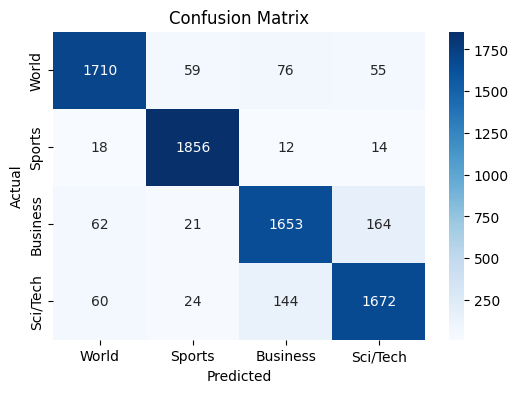

In [24]:
cm = confusion_matrix(df_test['label'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names.values(),
            yticklabels=label_names.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**model accuracy**

In [25]:
acc = accuracy_score(df_test['label'], y_pred)
print(f"Logistic Regression Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9067


# **5. Bonus: Word Cloud Visualization**

**Import WordCloud library**

In [26]:
from wordcloud import WordCloud

**Generate and display word clouds for each category**

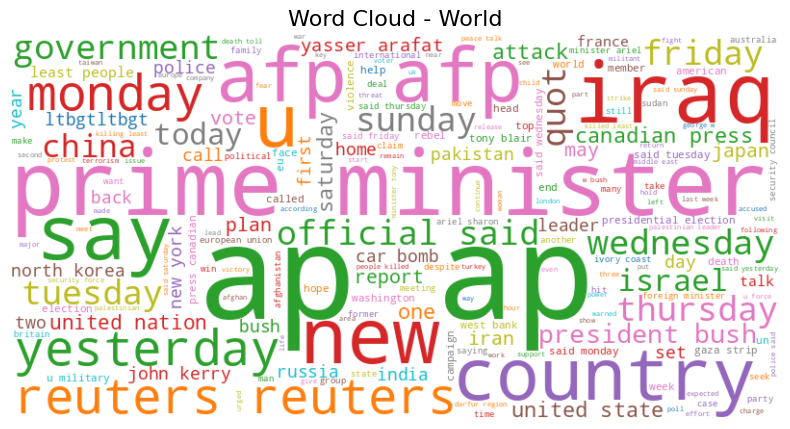

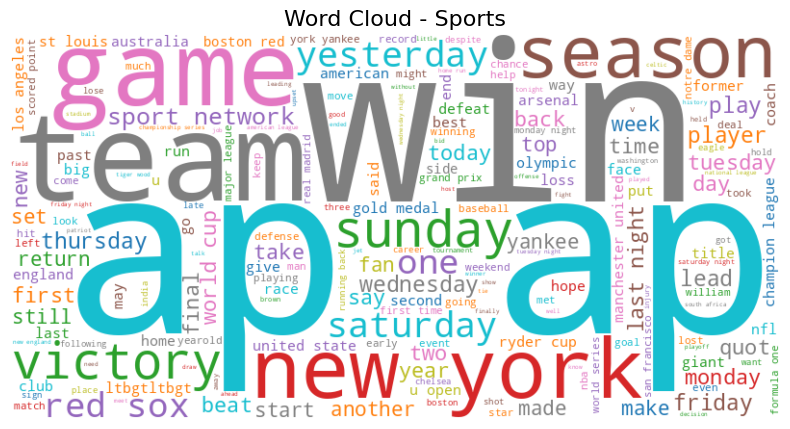

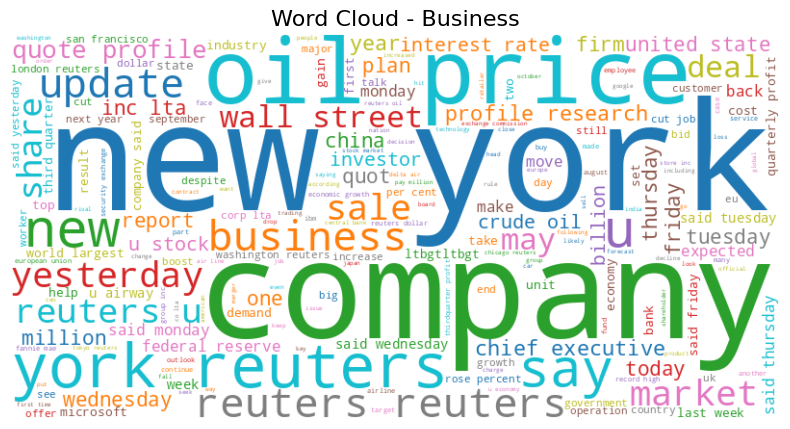

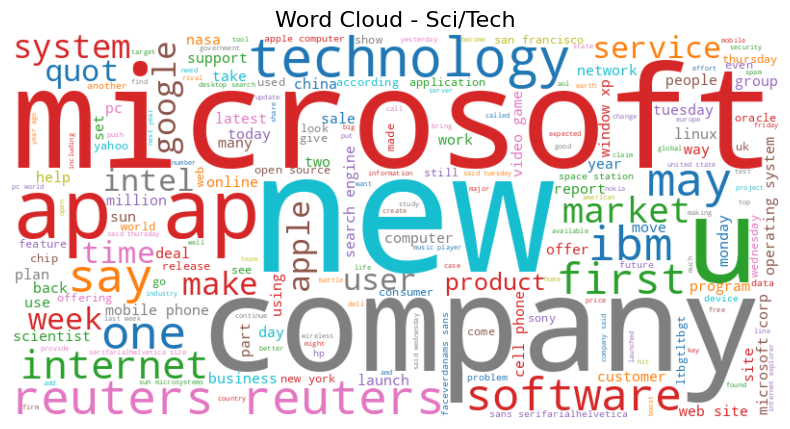

In [27]:
for label, category in label_names.items():
    # Concatenate all processed texts for this category
    category_text = " ".join(df_train[df_train["label"] == label]["processed_text"])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="tab10").generate(category_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {category}", fontsize=16)
    plt.show()

# **5.1 Bonus: Bar Plots of Most Frequent Words per Category**

**Import supporting libraries**

In [28]:
from collections import Counter
import numpy as np

**function to extract top N frequent words per category**

In [29]:
def get_top_n_words(texts, n=20):
    all_words = " ".join(texts).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

**Generate bar plots per category**

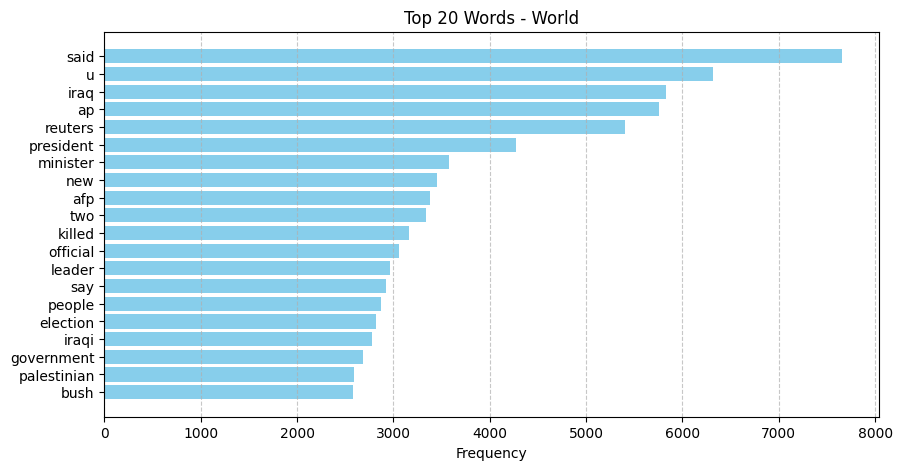

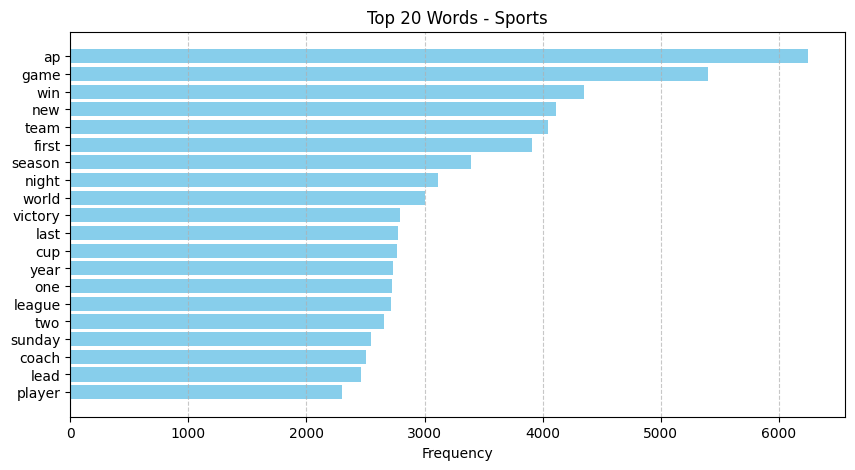

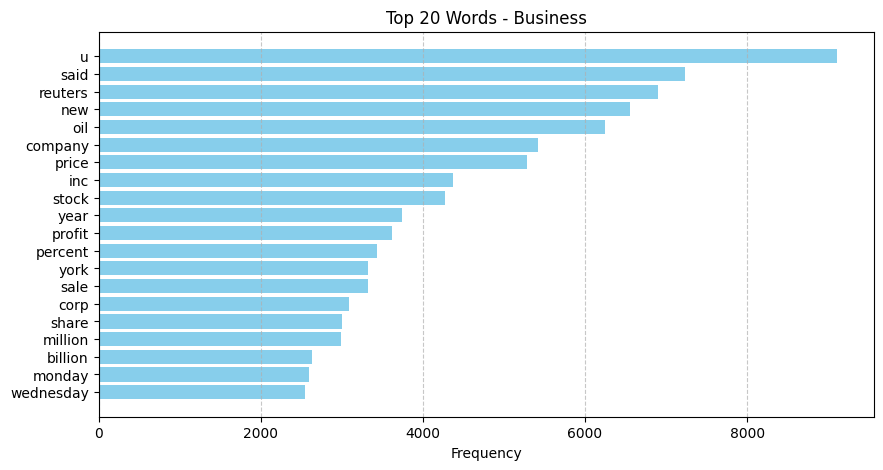

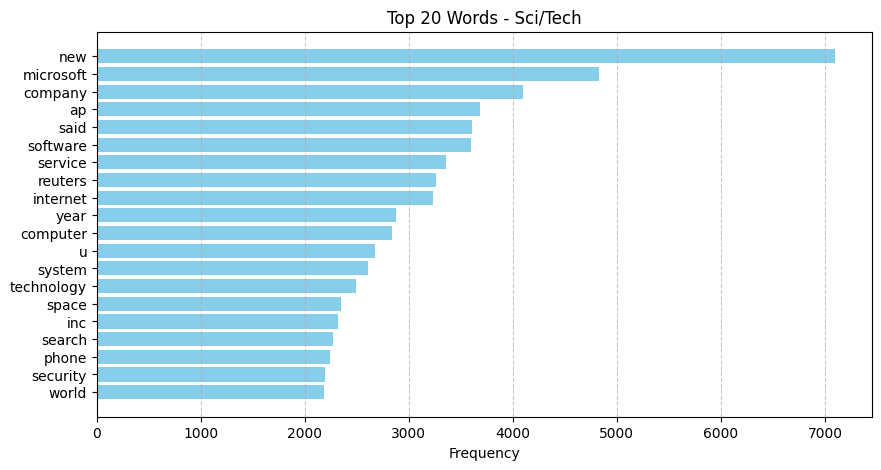

In [30]:
for label, category in label_names.items():
    # Get processed texts for this category
    texts = df_train[df_train['label'] == label]['processed_text']

    top_words = get_top_n_words(texts, n=20)

    # Separate words and counts
    words, counts = zip(*top_words)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel("Frequency")
    plt.title(f"Top 20 Words - {category}")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# **6. Bonus: Neural Network Model with Keras**

**Install TensorFlow if needed**

In [31]:
!pip install tensorflow --quiet

**Import necessary modules**

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Convert labels to categorical (one-hot encoding)**

In [48]:
y_train_nn = to_categorical(df_train['label'], num_classes=4)
y_test_nn = to_categorical(df_test['label'], num_classes=4)

**Parameters**

In [44]:
vocab_size = 10000
sequence_length = 100

**Initialize and fit tokenizer**

In [45]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df_train['processed_text'])

**Convert texts to sequences**

In [46]:
X_train_seq = tokenizer.texts_to_sequences(df_train['processed_text'])
X_test_seq = tokenizer.texts_to_sequences(df_test['processed_text'])

**Pad sequences**

In [47]:
X_train_pad = pad_sequences(X_train_seq, maxlen=sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=sequence_length, padding='post')

**model**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=200, input_length=sequence_length),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**compile**

In [50]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train**

In [51]:
history = model.fit(X_train_pad, y_train_nn,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=64,
                    verbose=1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 182s 119ms/step - accuracy: 0.7550 - loss: 0.5947 - val_accuracy: 0.9017 - val_loss: 0.2778
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 199s 117ms/step - accuracy: 0.9373 - loss: 0.1885 - val_accuracy: 0.8981 - val_loss: 0.3147
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 199s 115ms/step - accuracy: 0.9719 - loss: 0.0834 - val_accuracy: 0.8906 - val_loss: 0.4317
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 173s 115ms/step - accuracy: 0.9859 - loss: 0.0436 - val_accuracy: 0.8825 - val_loss: 0.4514
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 198s 112ms/step - accuracy: 0.9912 - loss: 0.0301 - val_accuracy: 0.8837 - val_loss: 0.6316


**Evaluate on test set**

In [54]:
loss, accuracy = model.evaluate(X_test_pad, y_test_nn)
print(f"Neural Network Accuracy: {accuracy:.4f}")

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8971 - loss: 0.5910
Neural Network Accuracy: 0.8958


**Plot training history**

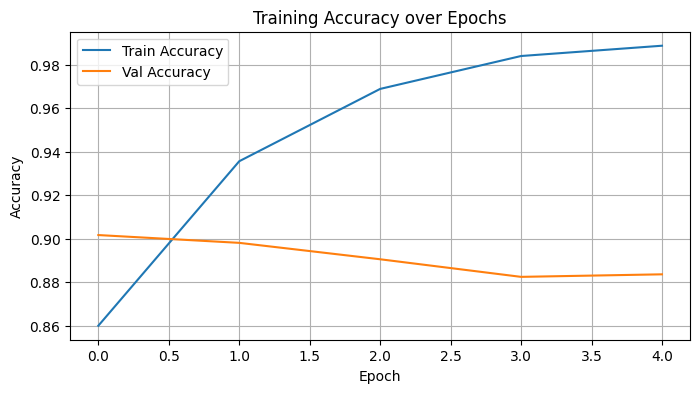

In [55]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# **7. Summary & Save Outputs**

**Save Preprocessed Datasets**

In [39]:
df_train.to_csv("ag_news_train_processed.csv", index=False)
df_test.to_csv("ag_news_test_processed.csv", index=False)
print("Preprocessed datasets saved.")

Preprocessed datasets saved.


**Save Logistic Regression Model and TF-IDF Vectorizer**

In [40]:
import joblib

joblib.dump(clf, "logistic_regression_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print(" Scikit-learn model and TF-IDF vectorizer saved.")

 Scikit-learn model and TF-IDF vectorizer saved.


**Save Word Clouds as Image Files**

In [41]:
from wordcloud import WordCloud

for label, category in label_names.items():
    category_text = " ".join(df_train[df_train["label"] == label]["processed_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(category_text)
    wordcloud.to_file(f"wordcloud_{category.lower().replace('/', '_')}.png")

print(" Word cloud images saved.")

 Word cloud images saved.


**Save Neural Network Model (Keras)**

In [42]:
model.save("news_classification_nn.keras")
print(" Neural network model saved.")

 Neural network model saved.
